# settings

In [1]:
import sys
sys.path.append('../../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
# from scripts.variable_local import AutoAdjustmentTransactionMulti
from scripts.exec_simulator import ExecuteAutoAdjustmentTransactionSingle, ExecuteAutoAdjustmentTransactionMulti
from scripts.price_data.get_price import GetPriceData
from scripts.visualizer import LogVisualizer
from scripts.types import PortfolioItem, PortfolioWithPriorityItem, TransactionOption

price_getter = GetPriceData()

from pprint import pprint

In [2]:
# Relative path to save data
from pathlib import Path

data_dir = Path('./data/')
data_dir.mkdir(parents=True, exist_ok=True)

# portfolio

## Borrower portfolio

In [3]:
# a
borrower_portfolio_a = {
    'JPY': {
        'num': 50000000,
        'is_usd': False,
        'priority': 10,
    },
    '8306.T': {
        'num': 2000000,
        'is_usd': False,
        'priority': 1,
    },
    '8604.T': {
        'num': 100000,
        'is_usd': False,
        'priority': 0,
    }
}

# 担保急落シナリオ
borrower_portfolio_down = {
    '8306.T': {
        'num': 1000000,
        'is_usd': False,
        'priority': 5,
    },
    '8604.T': {
        'num': 1000000,
        'is_usd': False,
        'priority': 4,
    },
    '4901.T': {
        'num': 1000000,
        'is_usd': False,
        'priority': 3,
    },
    '7013.T': {
        'num': 1000000,
        'is_usd': False,
        'priority': 2,
    },
    '8031.T': {
        'num': 1000000,
        'is_usd': False,
        'priority': 1,
    },
}

'^TNX'


'^TNX'

In [4]:
912 * 3000000 + 490 * 3000000

4206000000

## Lender portfolio

In [5]:
# NVIDIA
lender_portfolio_a = {
    'NVDA': {
        'num': 50000,
        'is_usd': True
    },
    'AAPL': {
        'num': 50000,
        'is_usd': True
    },
}

# 担保急落シナリオ
lender_portfolio_jpy_0 = {
    'JPY': {
        'num': 8616500000,
        'is_usd': False,
        'priority': 1,
    }
}

lender_portfolio_jpy_1 = {
    'JPY': {
        'num': 7595250000,
        'is_usd': False,
        'priority': 1,
    }
}

lender_portfolio_jpy_2 = {
    'JPY': {
        'num': 4713900000,
        'is_usd': False,
        'priority': 1,
    }
}

lender_portfolio_jpy_3 = {
    'JPY': {
        'num': 5176550000,
        'is_usd': False,
        'priority': 1,
    }
}


# models (options)

## model0
現行手続きモデル

In [6]:
options_0: TransactionOption = {
    'borrower_loan_ratio': 0.95,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
    'is_manual': True,
}

## model1
ベースモデル（単一トークン価格調整、マージンコール閾値設定なし）

In [7]:
options_1: TransactionOption = {
    'borrower_loan_ratio': 0.95,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
}

## model2
ベースモデル（複数トークン価格調整、マージンコール閾値設定なし）

In [8]:
options_2 = {
    'borrower_loan_ratio': 0.95,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
}

## model3
ベースモデル（単一トークン価格調整、マージンコール閾値設定あり）

In [9]:
options_3 = {
    'borrower_loan_ratio': 0.95,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
    'margin_call_threshold': 0.02
}

## model4
ベースモデル（複数トークン価格調整、マージンコール閾値設定あり）

In [10]:
options_4 = {
    'borrower_loan_ratio': 0.95,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False,
    'margin_call_threshold': 0.02
}

In [11]:
824+1423+3050+1880+1893
923+1405+2715+1600+1352
485+569+1904+1020+984
509+678+2300+1110+852

5449

In [12]:
5449*0.95

5176.55

# simulations

## リーマンショック前後（2008/9 - 2009/9）

In [13]:
start_date_0 = date(2008, 9, 1)
end_date_0 = date(2009, 9, 1)

In [16]:
simulator_0 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_0, start_date_0, end_date_0,  options=options_0)
print('Start simulation model0...')
%time logs_0 = simulator_0.execute()
print("End simulation model0!!!")

("JCT portfolio: {'8306.T': {'num': 1000000, 'is_usd': False, 'priority': 5}, "
 "'8604.T': {'num': 1000000, 'is_usd': False, 'priority': 4}, '4901.T': "
 "{'num': 1000000, 'is_usd': False, 'priority': 3}, '7013.T': {'num': 1000000, "
 "'is_usd': False, 'priority': 2}, '8031.T': {'num': 1000000, 'is_usd': False, "
 "'priority': 1}}")
"ST portfolio: {'JPY': {'num': 8616500000, 'is_usd': False, 'priority': 1}}"
2008-09-01: Price updating...
JPY: 1.0
2008-09-01: Price updating...
8306.T: 824.0
8604.T: 1423.0
4901.T: 3050.0
7013.T: 1880.0
8031.T: 1893.0
"8306.T: {'num': 1000000, 'is_usd': False, 'priority': 5, 'price': 824.0}"
"8604.T: {'num': 1000000, 'is_usd': False, 'priority': 4, 'price': 1423.0}"
"4901.T: {'num': 1000000, 'is_usd': False, 'priority': 3, 'price': 3050.0}"
"7013.T: {'num': 1000000, 'is_usd': False, 'priority': 2, 'price': 1880.0}"
"8031.T: {'num': 1000000, 'is_usd': False, 'priority': 1, 'price': 1893.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2008-09-09: Price updating...
JPY: 1.0
2008-09-09: Price updating...
8306.T: 840.0
8604.T: 1484.0
4901.T: 3100.0
7013.T: 1780.0
8031.T: 1561.0
adjust by single token manually.
from Borrower(A) to Lender(B)
@@@@@@@@@@@@@@price adjustment will be done by tomorrow@@@@@@@@@@@@@@
--------------------DONE(manual)------------------------
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-09-10
2008-09-10: Price updating...
JPY: 1.0
2008-09-10: Price updating...
8306.T: 867.0
8604.T: 1531.0
4901.T: 3130.0
7013.T: 1770.0
8031.T: 1531.0
adjust by single token manually.
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment will be done by tomorrow@@@@@@@@@@@@@@
--------------------DONE(manual)------------------------
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

KeyboardInterrupt: 

End simulation model0!!!


In [17]:
visualizer_0 = LogVisualizer(logs_0, './data/all_term')
visualizer_0.compare_collateral_portfolio()
collateral_percentages_0 = visualizer_0.calc_collateral_percentage()

NameError: name 'logs_0' is not defined

Log Visualizer initialized.


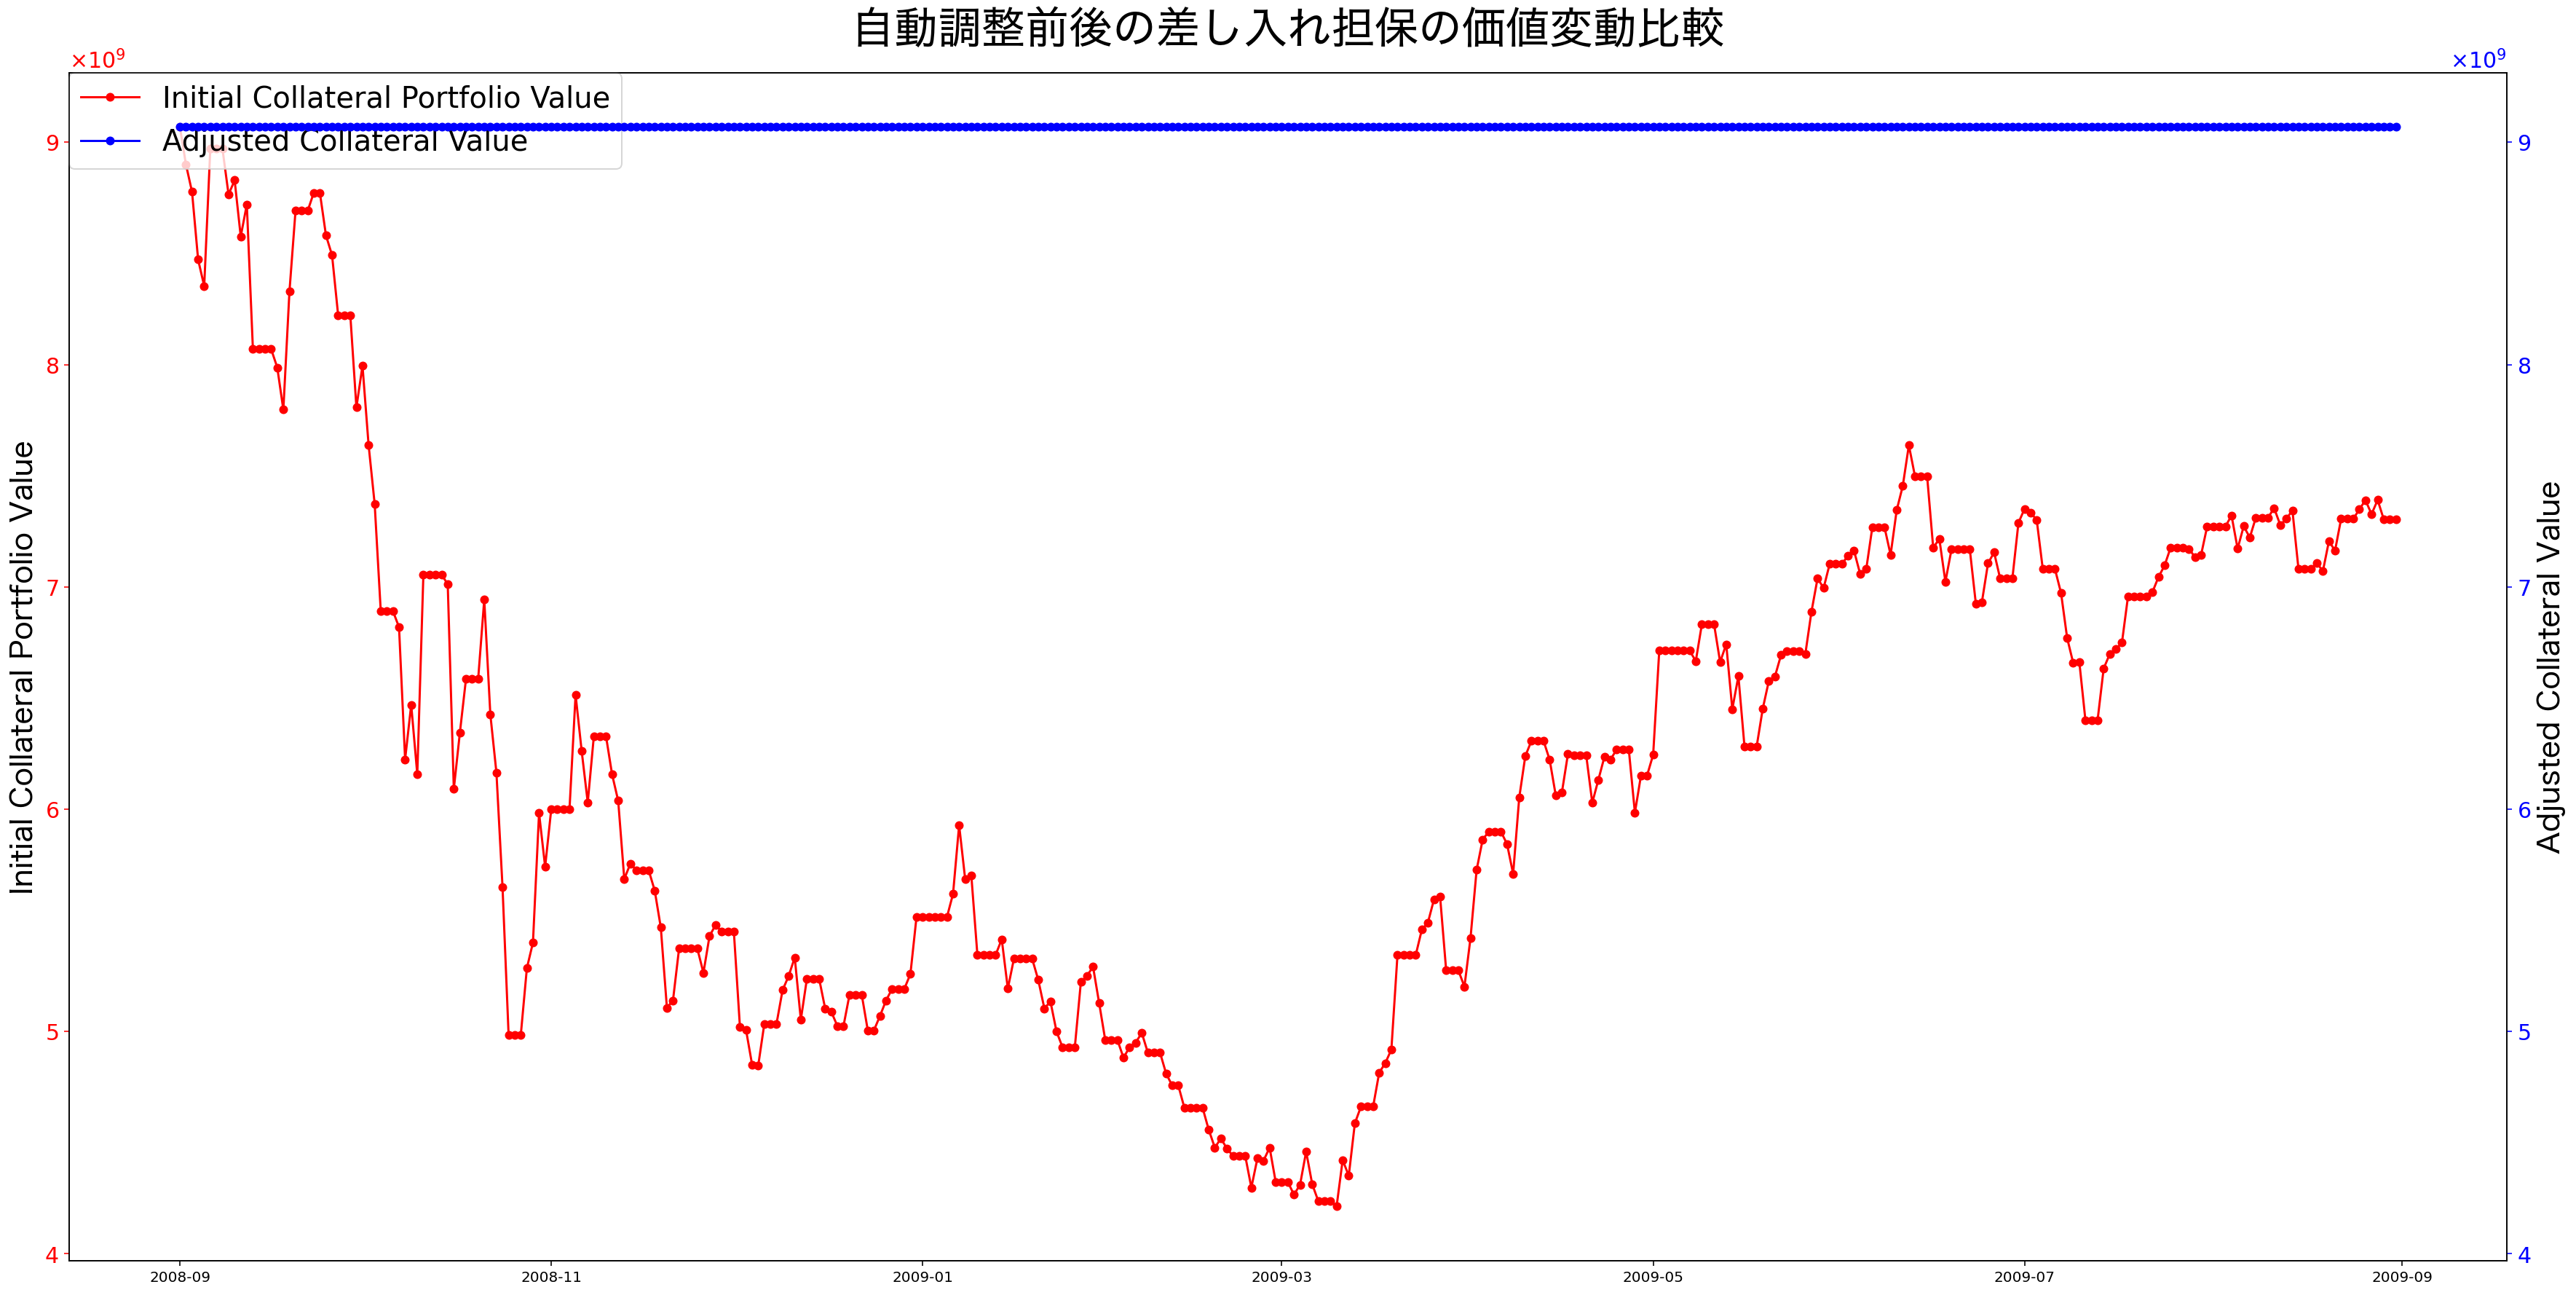

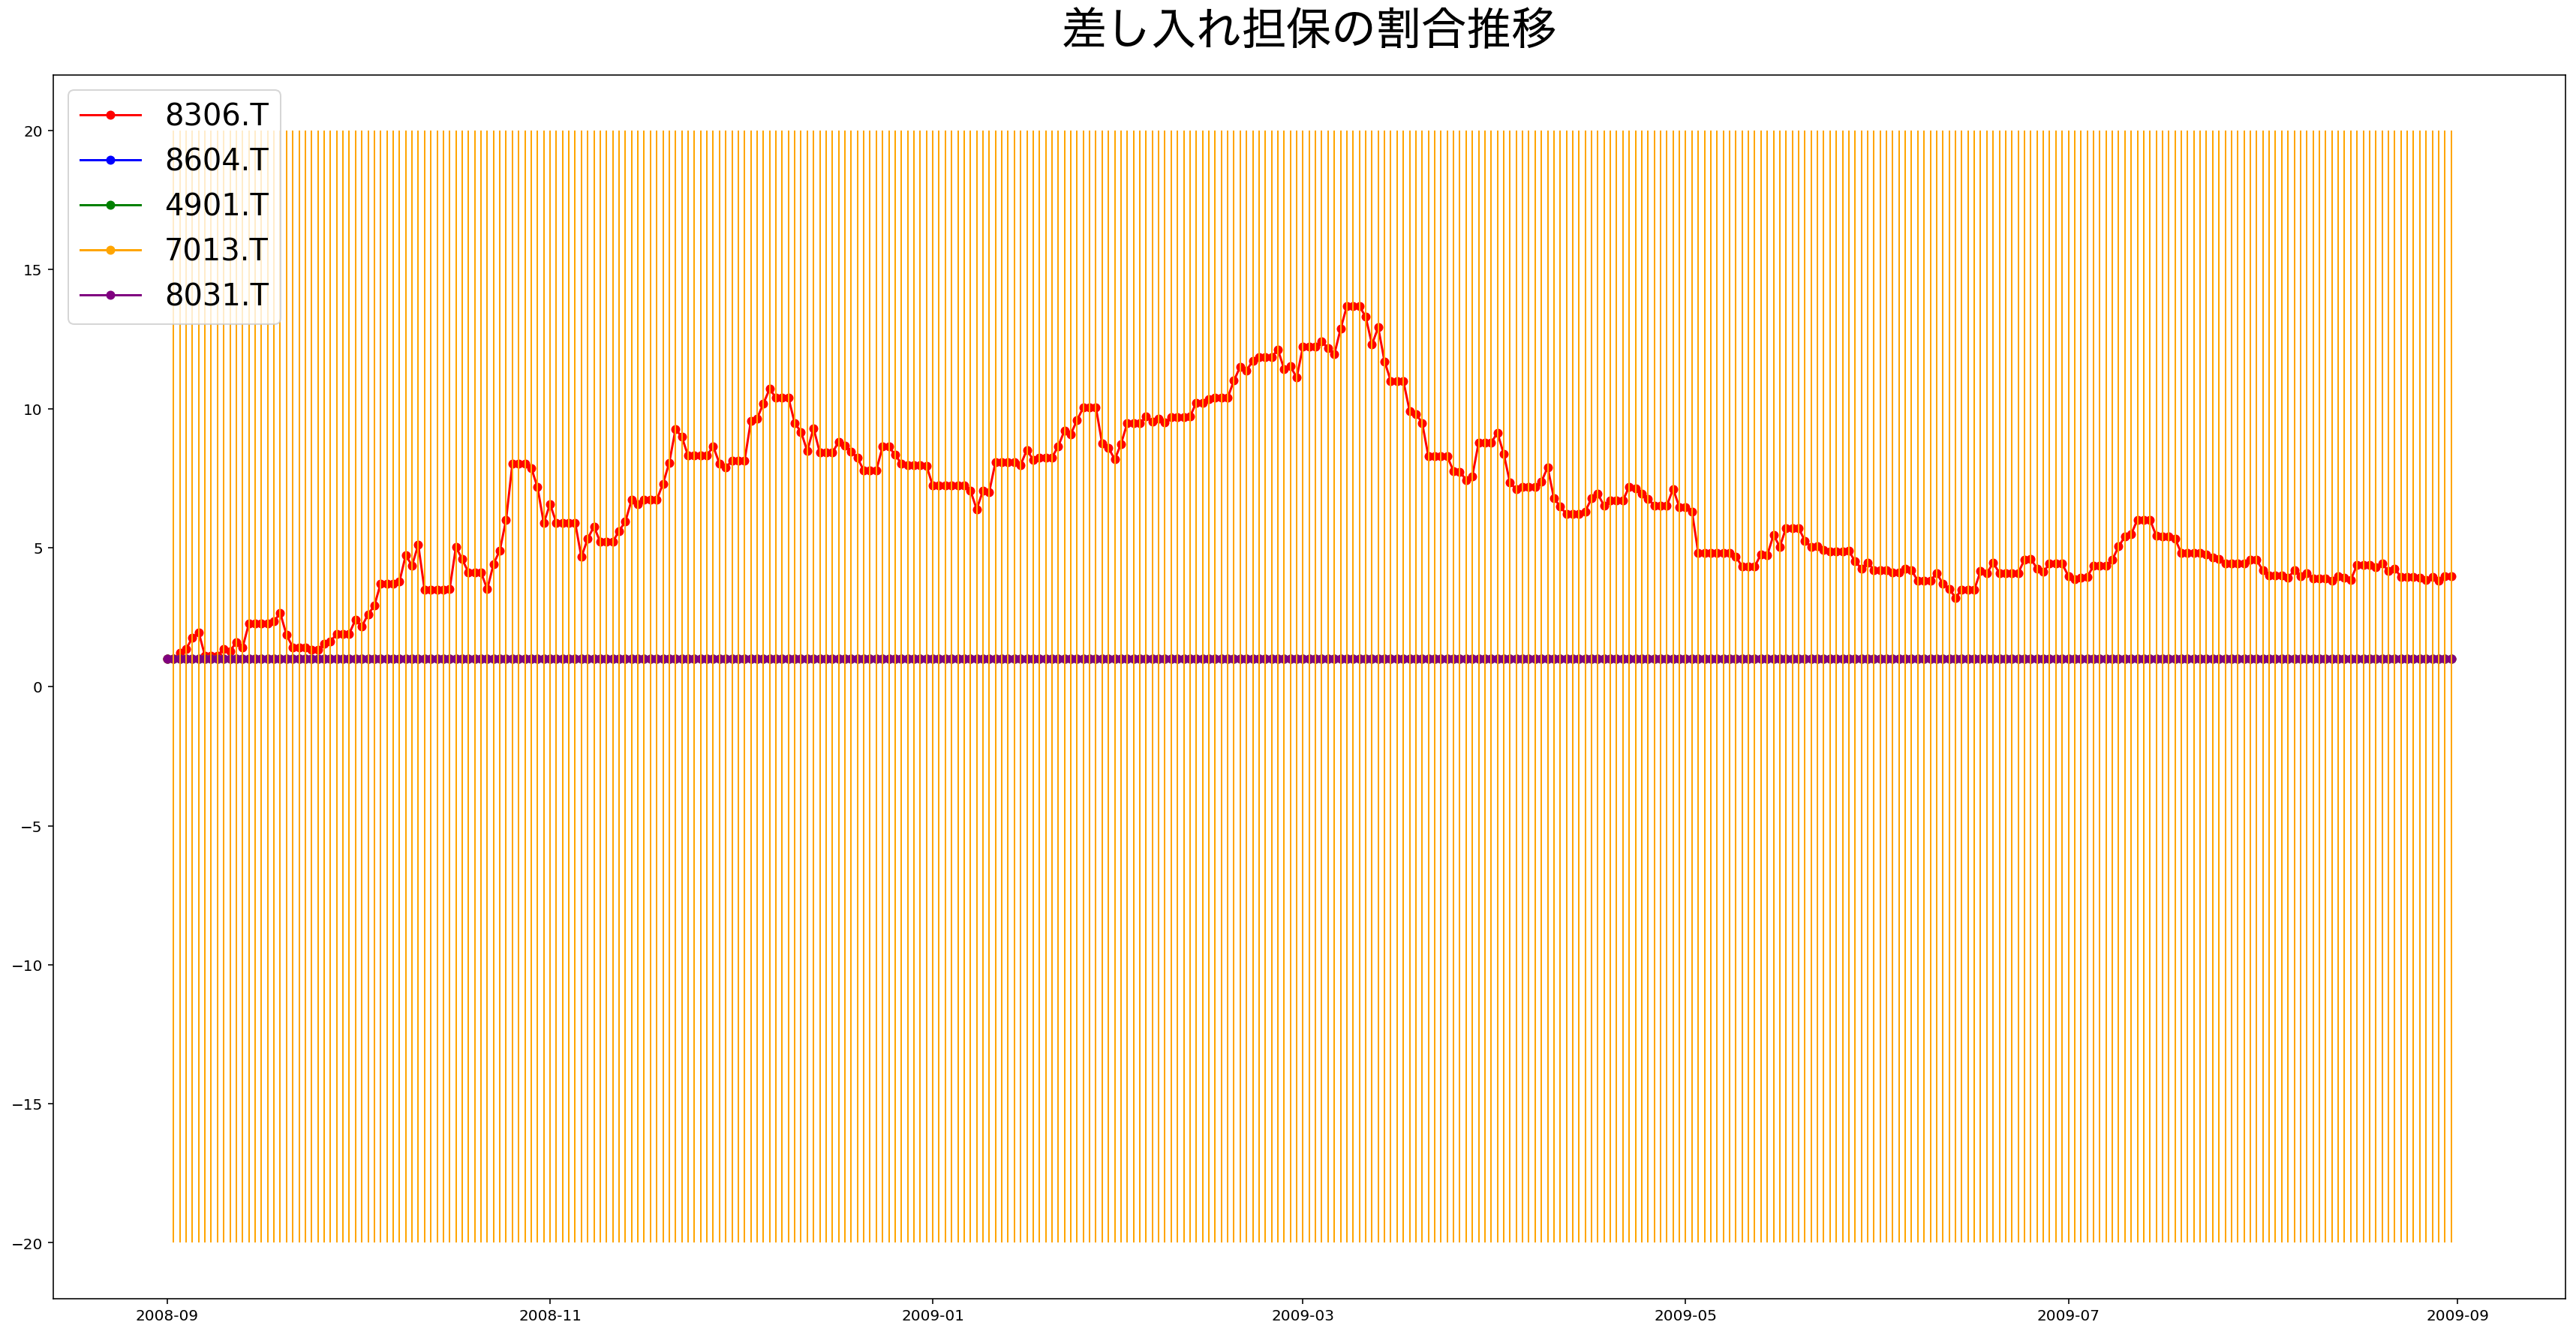

In [14]:
saved_logs_all_term = np.load('./data/all_term.npy', allow_pickle=True).item()
visualizer_all_term = LogVisualizer(saved_logs_all_term)
visualizer_all_term.compare_collateral_portfolio()
collateral_percentages_all_term = visualizer_all_term.calc_collateral_percentage()

## シナリオ1

In [15]:
# シミュレーションの日付設定
start_date_1 = date(2008, 10, 1)
end_date_1 = date(2008, 11, 29)

### model0
現行手続きモデル

In [ ]:
simulator_s1_m0 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_1, start_date_1, end_date_1,  options=options_0)
print('Start simulation model0...')
%time logs_s1_m0 = simulator_s1_m0.execute()
print("End simulation model0!!!")

("JCT portfolio: {'8306.T': {'num': 1000000, 'is_usd': False, 'priority': 5}, "
 "'8604.T': {'num': 1000000, 'is_usd': False, 'priority': 4}, '4901.T': "
 "{'num': 1000000, 'is_usd': False, 'priority': 3}, '7013.T': {'num': 1000000, "
 "'is_usd': False, 'priority': 2}, '8031.T': {'num': 1000000, 'is_usd': False, "
 "'priority': 1}}")
"ST portfolio: {'JPY': {'num': 7595250000, 'is_usd': False, 'priority': 1}}"
2008-10-01: Price updating...
JPY: 1.0
2008-10-01: Price updating...
8306.T: 923.0
8604.T: 1405.0
4901.T: 2715.0
7013.T: 1600.0
8031.T: 1352.0
"8306.T: {'num': 1000000, 'is_usd': False, 'priority': 5, 'price': 923.0}"
"8604.T: {'num': 1000000, 'is_usd': False, 'priority': 4, 'price': 1405.0}"
"4901.T: {'num': 1000000, 'is_usd': False, 'priority': 3, 'price': 2715.0}"
"7013.T: {'num': 1000000, 'is_usd': False, 'priority': 2, 'price': 1600.0}"
"8031.T: {'num': 1000000, 'is_usd': False, 'priority': 1, 'price': 1352.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@

2008-10-09: Price updating...
JPY: 1.0
2008-10-09: Price updating...
8306.T: 776.0
8604.T: 1229.0
4901.T: 2125.0
7013.T: 1280.0
8031.T: 1060.0
adjust by single token manually.
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment will be done by tomorrow@@@@@@@@@@@@@@
--------------------DONE(manual)------------------------
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-10
2008-10-10: Price updating...
JPY: 1.0
2008-10-10: Price updating...
8306.T: 710.0
8604.T: 1225.0
4901.T: 1952.0
7013.T: 1230.0
8031.T: 1040.0
adjust by single token manually.
from Borrower(A) to Lender(B)
!!!!additional token issuing by Borrower(A)!!!!
--------------------DONE(manual)------------------------
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-11
2008-10-11

from Borrower(A) to Lender(B)
!!!!additional token issuing by Borrower(A)!!!!
--------------------DONE(manual)------------------------
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-26
2008-10-26: Price updating...
JPY: 1.0
2008-10-26: Price updating...
8306.T: 583.0
8604.T: 904.0
4901.T: 1755.0
7013.T: 980.0
8031.T: 762.0
adjust by single token manually.
from Lender(B) to Borrower(A)
@@@@@@@@@@@@@@price adjustment will be done by tomorrow@@@@@@@@@@@@@@
--------------------DONE(manual)------------------------
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2008-10-27
2008-10-27: Price updating...
JPY: 1.0
2008-10-27: Price updating...
8306.T: 583.0
8604.T: 904.0
4901.T: 1755.0
7013.T: 980.0
8031.T: 762.0
adjust by single token manually.
from Borrower(A)

In [ ]:
visualizer_s1_m0 = LogVisualizer(logs_s1_m0, './data/s1_m0')
visualizer_s1_m0.compare_collateral_portfolio()
collateral_percentages_s1_m0 = visualizer_s1_m0.calc_collateral_percentage()

In [ ]:
saved_logs_s1_m0 = np.load('./data/s1_m0.npy', allow_pickle=True).item()
saved_logs_s1_m0

In [ ]:
saved_logs_s1_m0 = np.load('./data/s1_m0.npy', allow_pickle=True).item()
visualizer_0_1 = LogVisualizer(saved_logs_s1_m0, './data/s1_m0')
visualizer_0_1.compare_collateral_portfolio()
collateral_percentages_0_1 = visualizer_0_1.calc_collateral_percentage()

### model1
ベースモデル（単一トークン価格調整、マージンコール閾値設定なし）

In [ ]:
simulator_s1_m1 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_1, start_date_1, end_date_1,  options=options_1)
print('Start simulation model1...')
%time logs_s1_m1 = simulator_s1_m1.execute()
print("End simulation model1!!!")

In [ ]:
visualizer_s1_m1 = LogVisualizer(logs_s1_m1, './data/s1_m1')
visualizer_s1_m1.compare_collateral_portfolio()
collateral_percentages_s1_m1 = visualizer_s1_m1.calc_collateral_percentage()

### model2
ベースモデル（複数トークン価格調整、マージンコール閾値設定なし）

In [ ]:
simulator_s1_m2 = ExecuteAutoAdjustmentTransactionMulti(borrower_portfolio_down, lender_portfolio_jpy_1, start_date_1, end_date_1,  options=options_2)
print('Start simulation model2...')
%time logs_s1_m2 = simulator_s1_m2.execute()
print("End simulation model2!!!")

In [ ]:
visualizer_s1_m2 = LogVisualizer(logs_s1_m2, './data/s1_m2')
visualizer_s1_m2.compare_collateral_portfolio()
collateral_percentages_s1_m2 = visualizer_s1_m2.calc_collateral_percentage()


### model3
ベースモデル（単一トークン価格調整、マージンコール閾値設定あり）

In [ ]:
simulator_s1_m3 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_1, start_date_1, end_date_1,  options=options_3)
print('Start simulation model3...')
%time logs_s1_m3 = simulator_s1_m3.execute()
print("End simulation model3!!!")

In [ ]:
visualizer_s1_m3 = LogVisualizer(logs_s1_m3, './data/s1_m3')
visualizer_s1_m3.compare_collateral_portfolio()
collateral_percentages_s1_m3 = visualizer_s1_m3.calc_collateral_percentage()

### model4
ベースモデル（複数トークン価格調整、マージンコール閾値設定あり）

In [ ]:
simulator_s1_m4 = ExecuteAutoAdjustmentTransactionMulti(borrower_portfolio_down, lender_portfolio_jpy_1, start_date_1, end_date_1,  options=options_4)
print('Start simulation model4...')
%time logs_s1_m4 = simulator_s1_m4.execute()
print("End simulation model4!!!")

In [ ]:
visualizer_s1_m4 = LogVisualizer(logs_s1_m4, './data/s1_m4')
visualizer_s1_m4.compare_collateral_portfolio()
collateral_percentages_s1_m4 = visualizer_s1_m4.calc_collateral_percentage()


## シナリオ2

In [ ]:
# シミュレーションの日付設定
start_date_2 = date(2009, 2, 1)
end_date_2 = date(2009, 4, 1)

### model0
現行手続きモデル

In [ ]:
simulator_s2_m0 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_2, start_date_2, end_date_2,  options=options_0)
print('Start simulation model0...')
%time logs_s2_m0 = simulator_s2_m0.execute()
print("End simulation model0!!!")

In [ ]:
visualizer_s2_m0 = LogVisualizer(logs_s2_m0, './data/s2_m0')
visualizer_s2_m0.compare_collateral_portfolio()
collateral_percentages_s2_m0 = visualizer_s2_m0.calc_collateral_percentage()

### model1
ベースモデル（単一トークン価格調整、マージンコール閾値設定なし）

In [ ]:
simulator_s2_m1 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_2, start_date_2, end_date_2,  options=options_1)
print('Start simulation model1...')
%time logs_s2_m1 = simulator_s2_m1.execute()
print("End simulation model1!!!")

In [ ]:
visualizer_s2_m1 = LogVisualizer(logs_s2_m1, './data/s2_m1')
visualizer_s2_m1.compare_collateral_portfolio()
collateral_percentages_s2_m1 = visualizer_s2_m1.calc_collateral_percentage()

### model2
ベースモデル（複数トークン価格調整、マージンコール閾値設定なし）

In [ ]:
simulator_s2_m2 = ExecuteAutoAdjustmentTransactionMulti(borrower_portfolio_down, lender_portfolio_jpy_2, start_date_2, end_date_2,  options=options_2)
print('Start simulation model2...')
%time logs_s2_m2 = simulator_s2_m2.execute()
print("End simulation model2!!!")

In [ ]:
visualizer_s2_m2 = LogVisualizer(logs_s2_m2, './data/s2_m2')
visualizer_s2_m2.compare_collateral_portfolio()
collateral_percentages_s2_m2 = visualizer_s2_m2.calc_collateral_percentage()


### model3
ベースモデル（単一トークン価格調整、マージンコール閾値設定あり）

In [ ]:
simulator_s2_m3 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_2, start_date_2, end_date_2,  options=options_3)
print('Start simulation model3...')
%time logs_s2_m3 = simulator_s2_m3.execute()
print("End simulation model3!!!")

In [ ]:
visualizer_s2_m3 = LogVisualizer(logs_s2_m3, './data/s2_m3')
visualizer_s2_m3.compare_collateral_portfolio()
collateral_percentages_s2_m3 = visualizer_s2_m3.calc_collateral_percentage()

### model4
ベースモデル（複数トークン価格調整、マージンコール閾値設定あり）

In [ ]:
simulator_s2_m4 = ExecuteAutoAdjustmentTransactionMulti(borrower_portfolio_down, lender_portfolio_jpy_2, start_date_2, end_date_2,  options=options_4)
print('Start simulation model4...')
%time logs_s2_m4 = simulator_s2_m4.execute()
print("End simulation model4!!!")

In [ ]:
visualizer_s2_m4 = LogVisualizer(logs_s2_m4, './data/s2_m4')
visualizer_s2_m4.compare_collateral_portfolio()
collateral_percentages_s2_m4 = visualizer_s2_m4.calc_collateral_percentage()


## シナリオ3

In [ ]:
# シミュレーションの日付設定
start_date_3 = date(2008, 12, 1)
end_date_3 = date(2009, 1, 29)

### model0
現行手続きモデル

In [ ]:
simulator_s3_m0 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_3, start_date_3, end_date_3,  options=options_0)
print('Start simulation model0...')
%time logs_s3_m0 = simulator_s3_m0.execute()
print("End simulation model0!!!")

In [ ]:
visualizer_s3_m0 = LogVisualizer(logs_s3_m0, './data/s3_m0')
visualizer_s3_m0.compare_collateral_portfolio()
collateral_percentages_s3_m0 = visualizer_s3_m0.calc_collateral_percentage()

### model1
ベースモデル（単一トークン価格調整、マージンコール閾値設定なし）

In [ ]:
simulator_s3_m1 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_3, start_date_3, end_date_3,  options=options_1)
print('Start simulation model1...')
%time logs_s3_m1 = simulator_s3_m1.execute()
print("End simulation model1!!!")

In [ ]:
visualizer_s3_m1 = LogVisualizer(logs_s3_m1, './data/s3_m1')
visualizer_s3_m1.compare_collateral_portfolio()
collateral_percentages_s3_m1 = visualizer_s3_m1.calc_collateral_percentage()

### model2
ベースモデル（複数トークン価格調整、マージンコール閾値設定なし）

In [ ]:
simulator_s3_m2 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_3, start_date_3, end_date_3,  options=options_2)
print('Start simulation model2...')
%time logs_s3_m2 = simulator_s3_m2.execute()
print("End simulation model2!!!")

In [ ]:
visualizer_s3_m2 = LogVisualizer(logs_s3_m2, './data/s3_m2')
visualizer_s3_m2.compare_collateral_portfolio()
collateral_percentages_s3_m2 = visualizer_s3_m2.calc_collateral_percentage()

### model3
ベースモデル（単一トークン価格調整、マージンコール閾値設定あり）

In [ ]:
simulator_s3_m3 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_3, start_date_3, end_date_3,  options=options_3)
print('Start simulation model3...')
%time logs_s3_m3 = simulator_s3_m3.execute()
print("End simulation model3!!!")

In [ ]:
visualizer_s3_m3 = LogVisualizer(logs_s3_m3, './data/s3_m3')
visualizer_s3_m3.compare_collateral_portfolio()
collateral_percentages_s3_m3 = visualizer_s3_m3.calc_collateral_percentage()

### model4
ベースモデル（複数トークン価格調整、マージンコール閾値設定あり）

In [ ]:
simulator_s3_m4 = ExecuteAutoAdjustmentTransactionSingle(borrower_portfolio_down, lender_portfolio_jpy_3, start_date_3, end_date_3,  options=options_4)
print('Start simulation model4...')
%time logs_s3_m4 = simulator_s3_m4.execute()
print("End simulation model4!!!")

In [ ]:
visualizer_s3_m4 = LogVisualizer(logs_s3_m4, './data/s3_m4')
visualizer_s3_m4.compare_collateral_portfolio()
collateral_percentages_s3_m4 = visualizer_s3_m4.calc_collateral_percentage()

# Visualization

## 概観

### シナリオ1

#### model0

In [ ]:
saved_logs_s1_m0 = np.load('./data/s1_m0.npy', allow_pickle=True).item()
visualizer_s1_m0 = LogVisualizer(saved_logs_s1_m0)
visualizer_s1_m0.compare_collateral_portfolio()
collateral_percentages_s1_m0 = visualizer_s1_m0.calc_collateral_percentage()

#### model1

In [ ]:
saved_logs_s1_m1 = np.load('./data/s1_m1.npy', allow_pickle=True).item()
visualizer_s1_m1 = LogVisualizer(saved_logs_s1_m1)
visualizer_s1_m1.compare_collateral_portfolio()
collateral_percentages_s1_m1 = visualizer_s1_m1.calc_collateral_percentage()

#### model2

In [ ]:
saved_logs_s1_m2 = np.load('./data/s1_m2.npy', allow_pickle=True).item()
visualizer_s1_m2 = LogVisualizer(saved_logs_s1_m2)
visualizer_s1_m2.compare_collateral_portfolio()
collateral_percentages_s1_m2 = visualizer_s1_m2.calc_collateral_percentage()

#### model3

In [ ]:
saved_logs_s1_m3 = np.load('./data/s1_m3.npy', allow_pickle=True).item()
visualizer_s1_m3 = LogVisualizer(saved_logs_s1_m3)
visualizer_s1_m3.compare_collateral_portfolio()
collateral_percentages_s1_m3 = visualizer_s1_m3.calc_collateral_percentage()

#### model4

In [ ]:
saved_logs_s1_m4 = np.load('./data/s1_m4.npy', allow_pickle=True).item()
visualizer_s1_m4 = LogVisualizer(saved_logs_s1_m4)
visualizer_s1_m4.compare_collateral_portfolio()
collateral_percentages_s1_m4 = visualizer_s1_m4.calc_collateral_percentage()

### シナリオ2

#### model0

In [ ]:
saved_logs_s2_m0 = np.load('./data/s2_m0.npy', allow_pickle=True).item()
visualizer_s2_m0 = LogVisualizer(saved_logs_s2_m0)
visualizer_s2_m0.compare_collateral_portfolio()
collateral_percentages_s2_m0 = visualizer_s2_m0.calc_collateral_percentage()

#### model1

In [ ]:
saved_logs_s2_m1 = np.load('./data/s2_m1.npy', allow_pickle=True).item()
visualizer_s2_m1 = LogVisualizer(saved_logs_s2_m1)
visualizer_s2_m1.compare_collateral_portfolio()
collateral_percentages_s2_m1 = visualizer_s2_m1.calc_collateral_percentage()

#### model2

In [ ]:
saved_logs_s2_m2 = np.load('./data/s2_m2.npy', allow_pickle=True).item()
visualizer_s2_m2 = LogVisualizer(saved_logs_s2_m2)
visualizer_s2_m2.compare_collateral_portfolio()
collateral_percentages_s2_m2 = visualizer_s2_m2.calc_collateral_percentage()

#### model3

In [ ]:
saved_logs_s2_m3 = np.load('./data/s2_m3.npy', allow_pickle=True).item()
visualizer_s2_m3 = LogVisualizer(saved_logs_s2_m3)
visualizer_s2_m3.compare_collateral_portfolio()
collateral_percentages_s2_m3 = visualizer_s2_m3.calc_collateral_percentage()

#### model4

In [ ]:
saved_logs_s2_m4 = np.load('./data/s2_m4.npy', allow_pickle=True).item()
visualizer_s2_m4 = LogVisualizer(saved_logs_s2_m4)
visualizer_s2_m4.compare_collateral_portfolio()
collateral_percentages_s2_m4 = visualizer_s2_m4.calc_collateral_percentage()

### シナリオ3

#### model0

In [ ]:
saved_logs_s3_m0 = np.load('./data/s3_m0.npy', allow_pickle=True).item()
visualizer_s3_m0 = LogVisualizer(saved_logs_s3_m0)
visualizer_s3_m0.compare_collateral_portfolio()
collateral_percentages_s3_m0 = visualizer_s3_m0.calc_collateral_percentage()

#### model1

In [ ]:
saved_logs_s3_m1 = np.load('./data/s3_m1.npy', allow_pickle=True).item()
visualizer_s3_m1 = LogVisualizer(saved_logs_s3_m1)
visualizer_s3_m1.compare_collateral_portfolio()
collateral_percentages_s3_m1 = visualizer_s3_m1.calc_collateral_percentage()

#### model2

In [ ]:
saved_logs_s3_m2 = np.load('./data/s3_m2.npy', allow_pickle=True).item()
visualizer_s3_m2 = LogVisualizer(saved_logs_s3_m2)
visualizer_s3_m2.compare_collateral_portfolio()
collateral_percentages_s3_m2 = visualizer_s3_m2.calc_collateral_percentage()

#### model3

In [ ]:
saved_logs_s3_m3 = np.load('./data/s3_m3.npy', allow_pickle=True).item()
visualizer_s3_m3 = LogVisualizer(saved_logs_s3_m3)
visualizer_s3_m3.compare_collateral_portfolio()
collateral_percentages_s3_m3 = visualizer_s3_m3.calc_collateral_percentage()

#### model4

In [ ]:
saved_logs_s3_m4 = np.load('./data/s3_m4.npy', allow_pickle=True).item()
visualizer_s3_m4 = LogVisualizer(saved_logs_s3_m4)
visualizer_s3_m4.compare_collateral_portfolio()
collateral_percentages_s3_m4 = visualizer_s3_m4.calc_collateral_percentage()

17:28~

## 考察用

In [ ]:
## 概要図